In [1]:
import pandas as pd  # Data handling
from scipy.integrate import odeint # numerical integration
import numpy as np
from pyvbmc import VBMC # VMBC object
from pyvbmc import VariationalPosterior
from pyvbmc.priors import SplineTrapezoidal
from scipy.optimize import minimize
import scipy.stats as scs
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from pyvbmc import VariationalPosterior
from pyvbmc.acquisition_functions import AcqFcnLog, AcqFcnNoisy, AcqFcnVIQR, AcqFcnIMIQR, AcqFcnVanilla
import sys
sys.path.insert(0, "/Users/walki/Desktop/SUAMI/BPE/metrics")
from metrics import Del_integral_n_dim

: 

In [3]:
options = {
    "display": "off",
    "max_fun_evals": 500,
    "search_acq_fcn": []
}

count = 0
seeds = np.arange(10)
acquisition_functions = [AcqFcnLog(), AcqFcnNoisy(), AcqFcnVIQR(), AcqFcnVanilla()]#, AcqFcnIMIQR()]
for i, acq in enumerate(acquisition_functions):
    options["search_acq_fcn"] = [acq]
    k1 = 1.
    k2 = 1.
    k3 = 1.
    k4 = 1.
    for j in range(1,4):
        for seed in seeds:
            name = "vps/vp" + str(i) + "_" +  str(j) + "_" + str(seed) + ".hdf5"
            count +=1
            vp = VariationalPosterior.load(name)
        k1 += 1.
        k2 += 1.
        k3 += 1.
        k4 += 1.
print(count)

120


In [6]:
vp.parameter_transformer(np.array([[1,1,1,1]]))

: 

: 

In [20]:
vp.plot();

: 

: 

In [6]:
count = 0
seed = 4
vps = np.zeros((N,N)).tolist()


for i,a in enumerate(a_vals):

    for j,b in enumerate(b_vals):
        #print(i,j)
        name = "vps/vp" + str(i) + "_" +  str(j) + "_" + str(seed) + ".hdf5"
        vp = VariationalPosterior.load(name)
        count +=1
        vps[i][j] = vp

samples = np.zeros((N,N)).tolist()
moments = np.zeros((N,N)).tolist()
print(a_vals)
print(b_vals)
for i,a in enumerate(a_vals):
    for j,b in enumerate(b_vals):
        vp = vps[i][j]
        Xs, _  = vps[i][j].sample(int(1e6))
        samples[i][j] = Xs
        moments[i][j] = np.array(Xs).mean(axis= 0)
samples_ary = np.array(samples)
moments = np.asarray(moments)

[0.1        0.16666667 0.23333333 0.3        0.36666667 0.43333333
 0.5       ]
[1.1 1.5 1.9 2.3 2.7 3.1 3.5]


 - Present with confidence
 - use minimal technical language
 - explain every new kind of plot
 - spend more time on SHO plot, explain all the things
 - preface with something like "we're going to use this algorithm to blah blah blah...
 - use "region" or "set" or "relationship" or "curve" something other than "line" for relationships between parameters to not annoy mathematicians.
 - make integration figure
 - worth mentioning that ultimate down the line is to use with physical measurements. finding parameters in real physical systems.

In [7]:
from matplotlib.colors import LinearSegmentedColormap
plt.style.use("ggplot")
# use red first, then blue then green for single plots
red = "#C41230"
blue  = "#007BC0"
green = "#009647"
gold = "#FDB515"
gray = "#6D6E71"
teal = "#008F91"


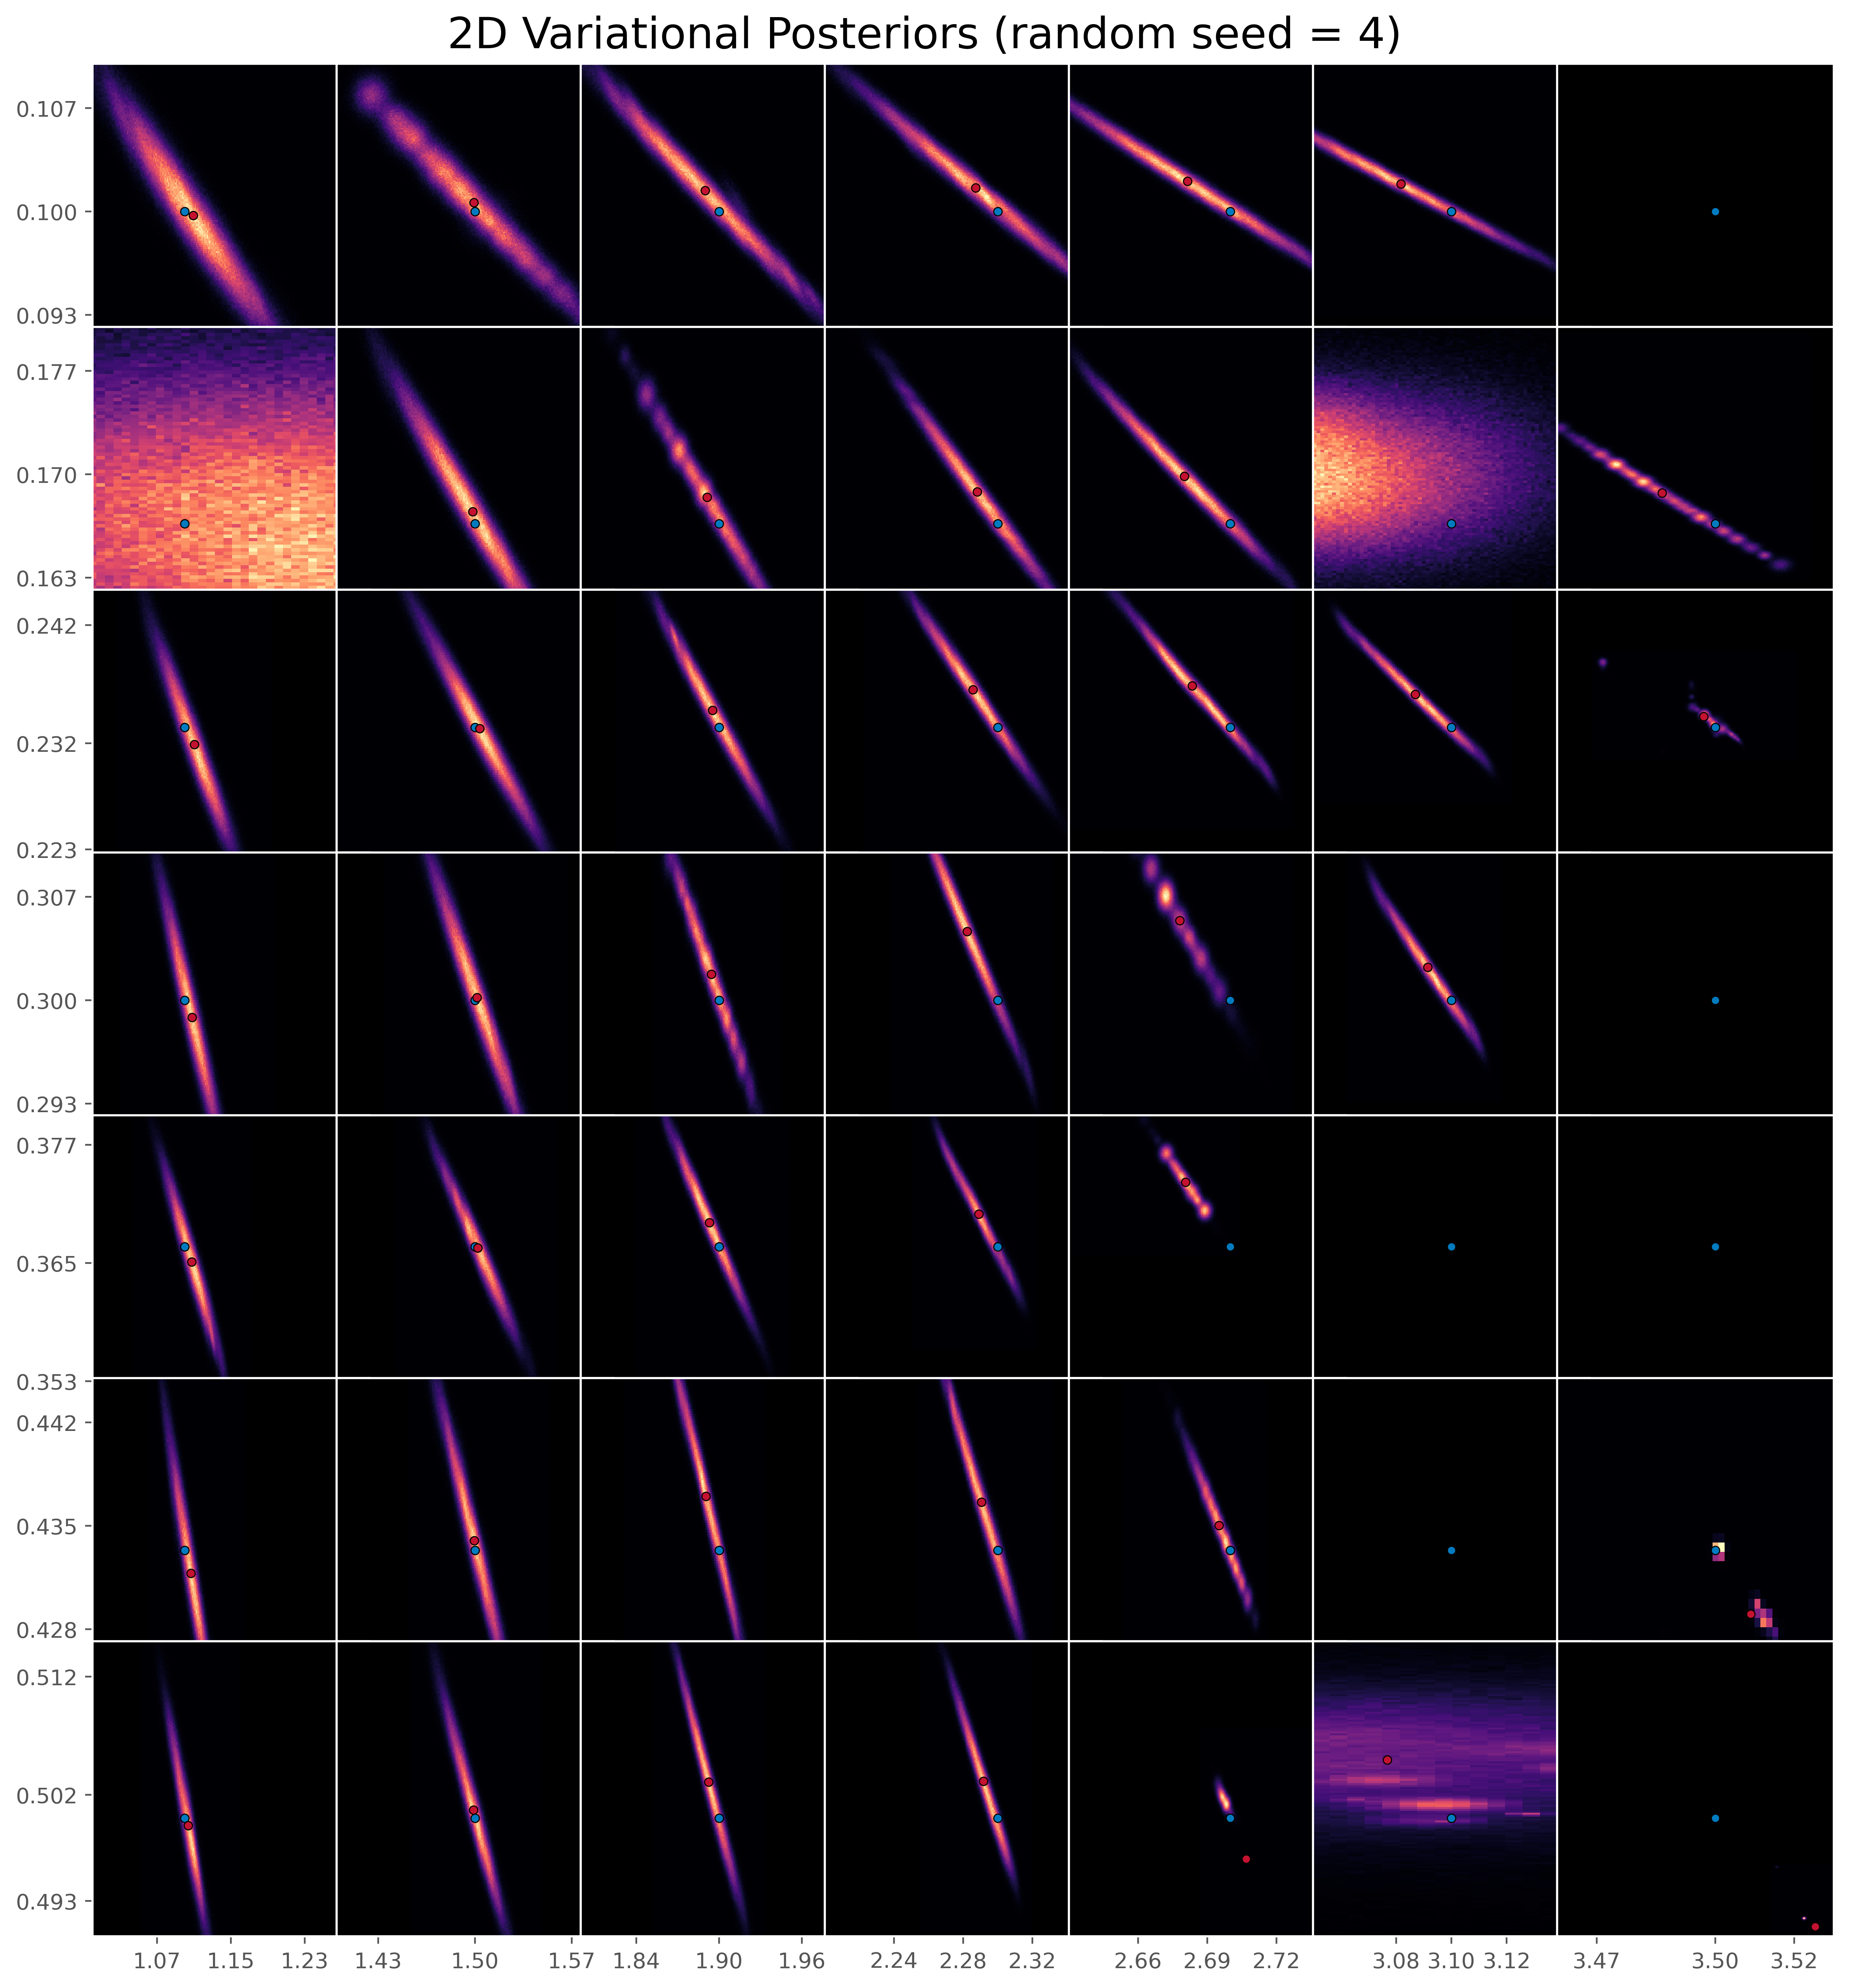

In [8]:
fig, axs = plt.subplots(N, N, figsize = (12,13),dpi = 400)
fig.patch.set_facecolor('White')
dy = 0.015
s = 15
dx = 0.12
for i,a in enumerate(a_vals):
    for j,b in enumerate(b_vals):
        Xs = samples_ary[i,j]
        axs[i,j].set_facecolor("black")
        axs[i,j].hist2d(Xs[:,1],Xs[:,0],bins = 300,cmap = "magma") 
        axs[i,j].scatter(b,a, s = s, c = blue,edgecolor = "black")
        axs[i,j].scatter(moments[i,j][1],moments[i,j][0], s = s, c = red, edgecolor = "black")
        
        #axs[i,j].set_title("a: " + str(np.around(a,3)) + " " + "b: " + str(np.around(b,3)), color = 'black', fontsize = 13)
        


        # axs[i,j].set_ylim((a-dy,a+dy))
        # axs[i,j].set_xlim((b-dx,b+dx))
        dy = 0.003
        if i == 0:
            axs[i,j].set_ylim((0.09,0.11))
            axs[i,j].set_yticks(np.around(np.linspace(0.09 + dy,0.11- dy,3),3))
        if i == 1:
            axs[i,j].set_ylim((0.16,0.18))
            axs[i,j].set_yticks(np.around(np.linspace(0.16 + dy,0.18 - dy,3),3))
        if i == 2:
            axs[i,j].set_ylim((0.22,0.245))
            axs[i,j].set_yticks(np.around(np.linspace(0.22 + dy,0.245- dy,3),3))
        if i == 3:
            axs[i,j].set_ylim((0.29,0.31))
            axs[i,j].set_yticks(np.around(np.linspace(0.29 + dy,0.31- dy,3),3))
        if i == 4:
            axs[i,j].set_ylim((0.35,0.38))
            axs[i,j].set_yticks(np.around(np.linspace(0.35+ dy,0.38- dy,3),3))
        if i == 5:
            axs[i,j].set_ylim((0.425,0.445))
            axs[i,j].set_yticks(np.around(np.linspace(0.425 + dy,0.445 - dy,3),3))
        if i == 6:
            axs[i,j].set_ylim((0.49,0.515)) 
            axs[i,j].set_yticks(np.around(np.linspace(0.49 + dy,0.515- dy,3),3))

        dx = 0.035
        if j == 0:
            axs[i,j].set_xlim((1.0,1.3))
            axs[i,j].set_xticks(np.around(np.linspace(1.0 + 2*dx,1.3- 2*dx,3),2))
        if j == 1:
            axs[i,j].set_xlim((1.4,1.6))
            axs[i,j].set_xticks(np.around(np.linspace(1.4 + dx,1.6- dx,3),2))
        if j == 2:
            axs[i,j].set_xlim((1.8,2.0))
            axs[i,j].set_xticks(np.around(np.linspace(1.8 + dx,2.0- dx,3),2))
        if j == 3:
            axs[i,j].set_xlim((2.2,2.36)) 
            axs[i,j].set_xticks(np.around(np.linspace(2.2 + dx,2.36- dx,3),2))
        if j == 4:
            axs[i,j].set_xlim((2.63,2.75))
            axs[i,j].set_xticks(np.around(np.linspace(2.63 + dx,2.75- dx,3),2))
        if j == 5:
            axs[i,j].set_xlim((3.05,3.15))
            axs[i,j].set_xticks(np.around(np.linspace(3.05 + dx,3.15- dx,3),2)) 
        if j == 6:
            axs[i,j].set_xlim((3.46,3.53))
            axs[i,j].set_xticks(np.around(np.linspace(3.47,3.52,3),2))

        if j == 0 and i == 6:
            pass
        elif j == 0:
            axs[i,j].set_xticks([])
        elif i == 6:
            axs[i,j].set_yticks([])
        else:
            axs[i,j].set_xticks([])
            axs[i,j].set_yticks([])

        axs[i,j].grid()

plt.suptitle("2D Variational Posteriors (random seed = 4)",color = "black", fontsize = 20)
plt.tight_layout(pad=1.1, w_pad = -1.5, h_pad=-1.5)
#plt.tight_layout()
plt.show()

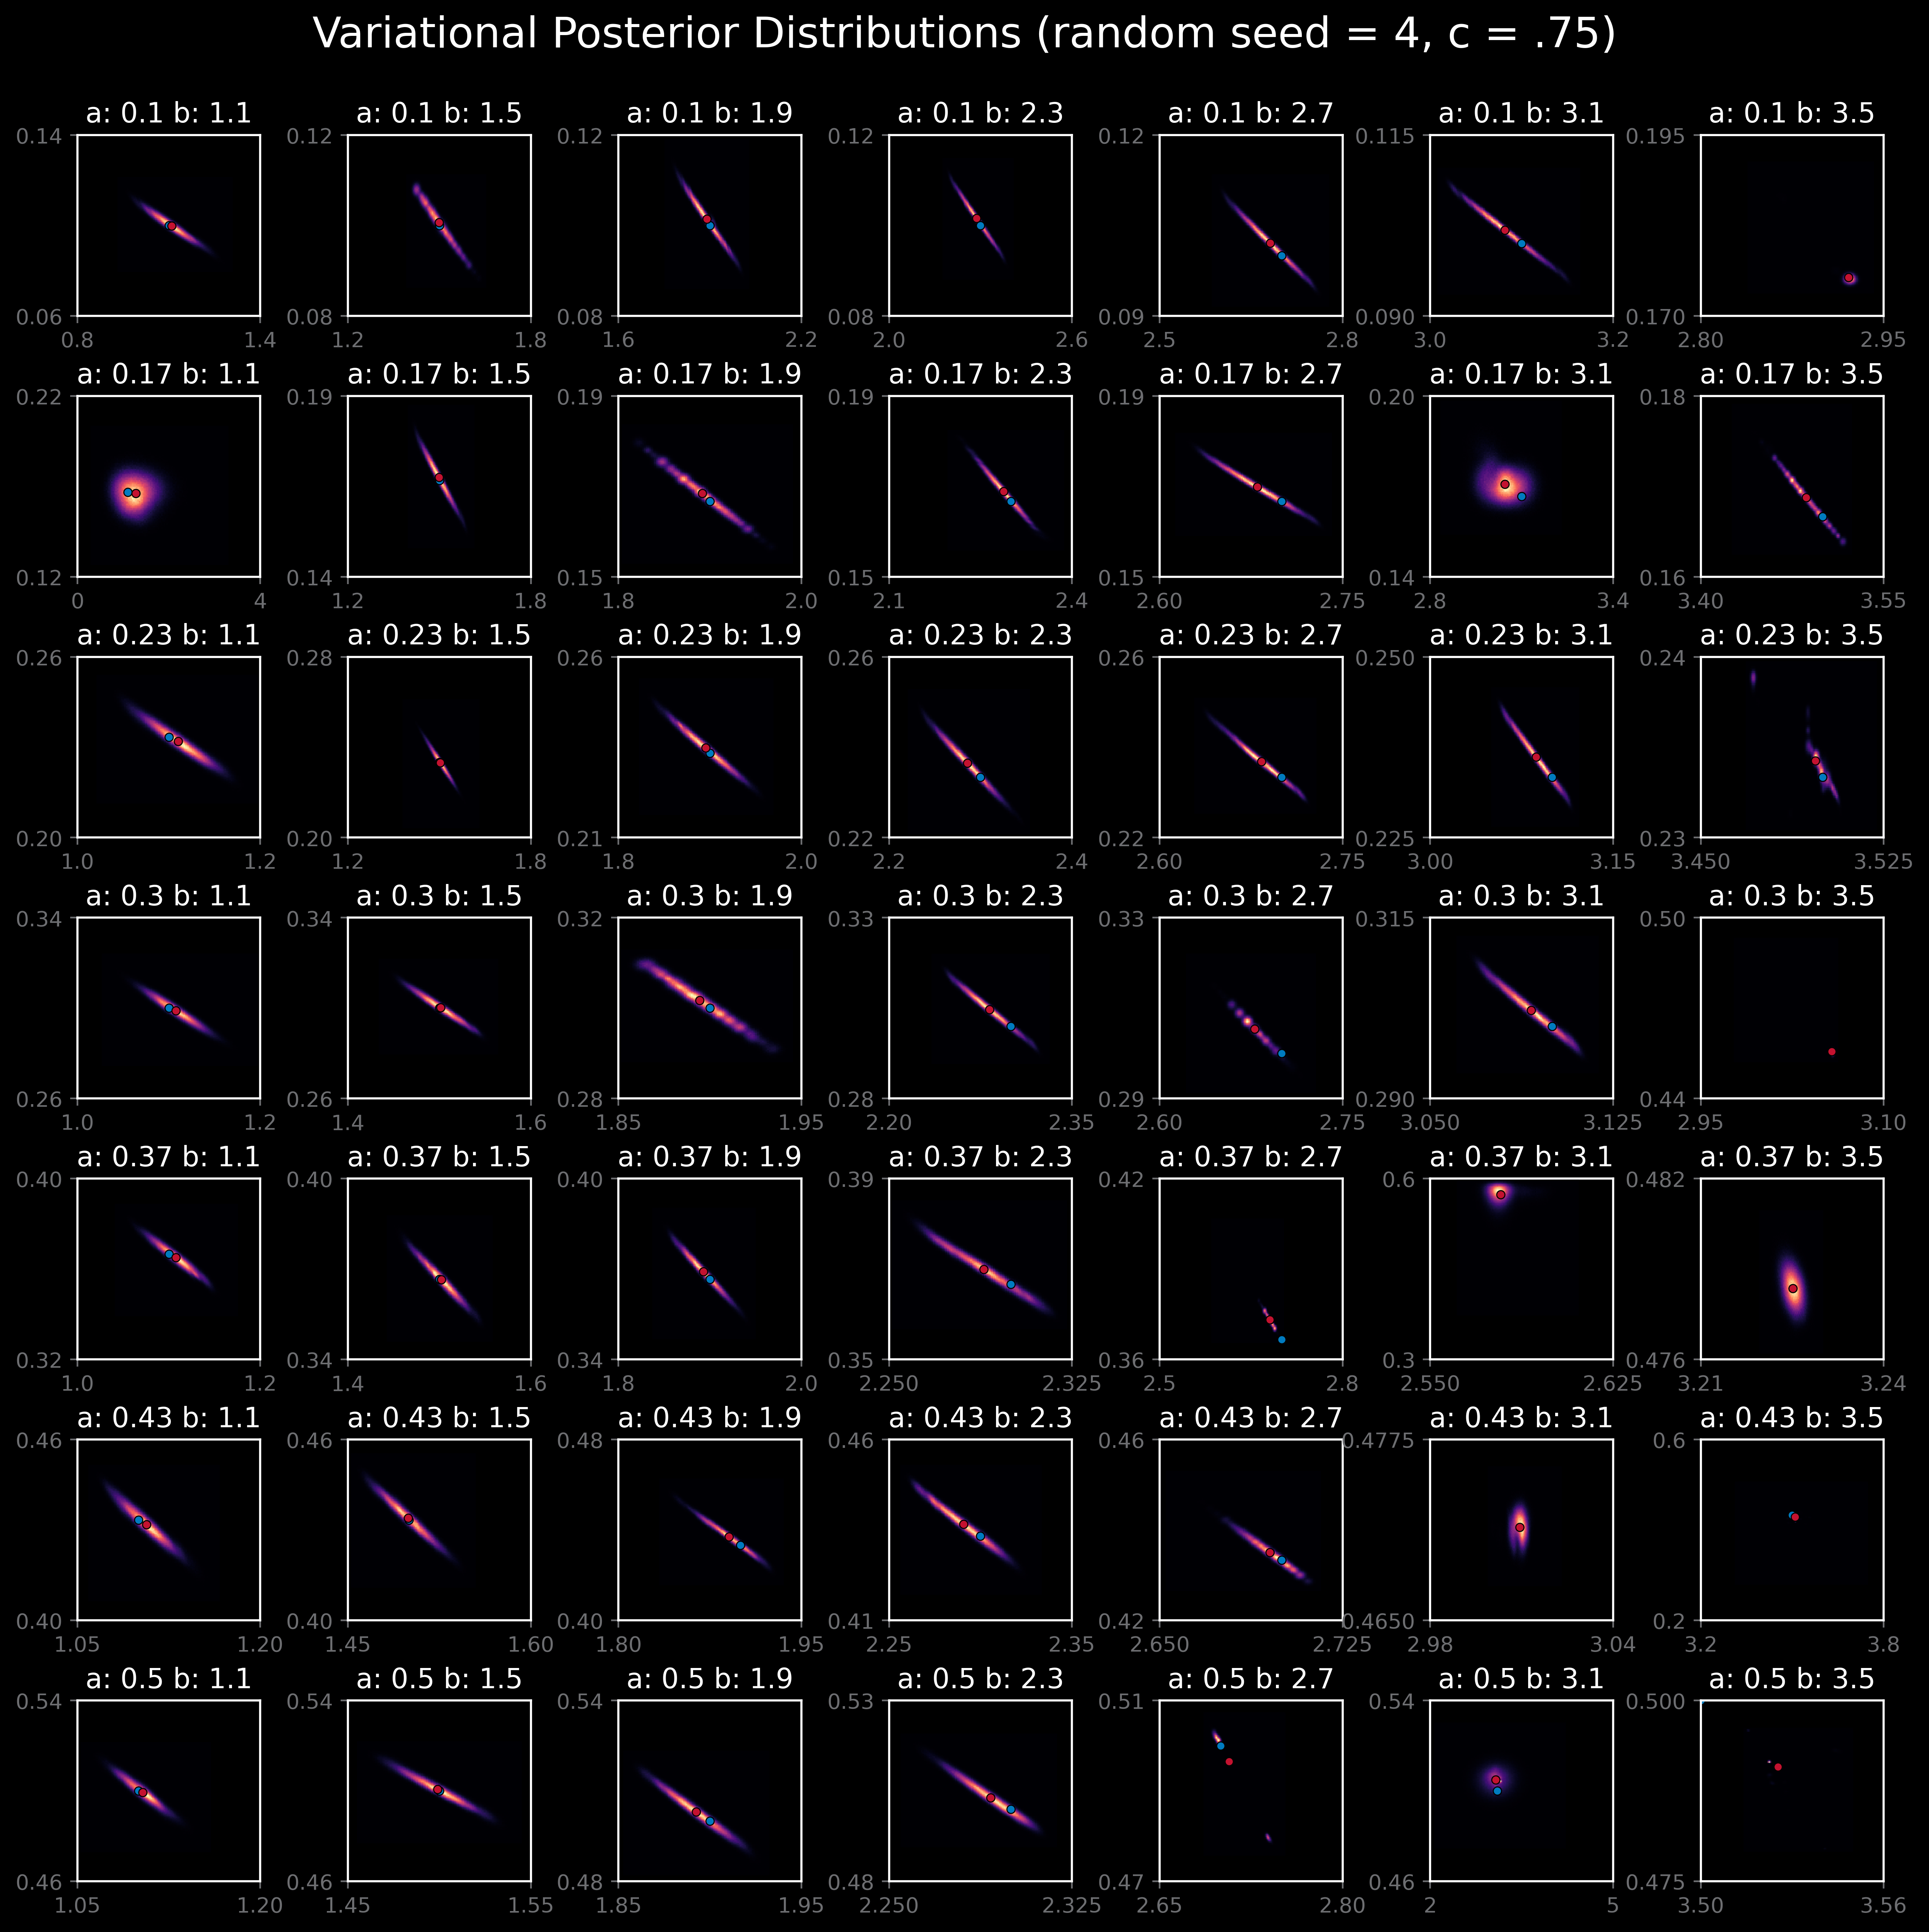

In [56]:
from matplotlib.colors import LinearSegmentedColormap
plt.style.use("ggplot")
# use red first, then blue then green for single plots
red = "#C41230"
blue  = "#007BC0"
green = "#009647"
gold = "#FDB515"
gray = "#6D6E71"
teal = "#008F91"
#cmap = LinearSegmentedColormap.from_list("", ["black",red])
fig, axs = plt.subplots(N, N, figsize = (13,13),dpi = 400)
fig.patch.set_facecolor('black')
dy = 0.05
s = 15
dx = 0.18
for i,a in enumerate(a_vals):
    for j,b in enumerate(b_vals):
        Xs = samples_ary[i,j]
        axs[i,j].set_facecolor("black")
        axs[i,j].hist2d(Xs[:,1],Xs[:,0],bins = 100,cmap = "magma")
        axs[i,j].scatter(b,a, s = s, c = blue,edgecolor = "black")
        axs[i,j].scatter(moments[i,j][1],moments[i,j][0], s = s, c = red, edgecolor = "black")
        axs[i,j].set_title("a: " + str(np.around(a,2)) + " " + "b: " + str(np.around(b,2)), color = 'white', fontsize = 13)
        xticks = axs[i,j].get_xticks()
        axs[i,j].set_xticks([xticks[0], xticks[-1]]) # set new tick positions
        axs[i,j].margins(x=0) # set tight margins
        yticks = axs[i,j].get_yticks()
        axs[i,j].set_yticks([yticks[0], yticks[-1]])
        axs[i,j].margins(y=0)
        axs[i,j].tick_params(axis='x', colors=gray)    #setting up X-axis tick color to red
        axs[i,j].tick_params(axis='y', colors=gray)
plt.suptitle("Variational Posterior Distributions (random seed = 4, c = .75)",color = "w", fontsize = 20)
plt.tight_layout(pad=2, w_pad = -1.5, h_pad=.5)
# plt.tight_layout()
# plt.locator_params(nbins=2)
plt.show()

C:\Users\walki\AppData\Local\Temp\ipykernel_10580\4125174353.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "mx" (-> color='m'). The keyword argument will take precedence.
  plt.plot(x, y, 'mx', color ='green')


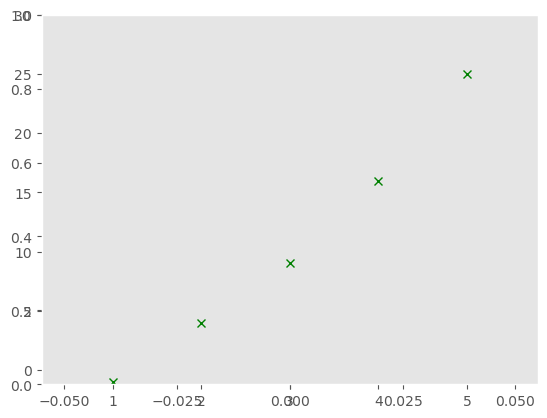

In [25]:
# importing libraries
import matplotlib.pyplot as plt
  
# Y-axis Values
y =[-1, 4, 9, 16, 25]
  
# X-axis Values
x =[1, 2, 3, 4, 5]
  
plt.locator_params(axis ='x', nbins = 5)
  
# adding grid to the plot
axes = plt.axes()
axes.grid()
  
# defining the plot
plt.plot(x, y, 'mx', color ='green')
  
# range of y-axis in the plot
plt.ylim(ymin =-1.2, ymax = 30)
  
# Set the margins
plt.margins(0.2)
  
# printing the plot
plt.show()

In [26]:
from n_dim_Del_integral import Del_integral_n_dim #(vp, true_value, n_samples, num_clusts, lower_thresh_const):
count = 0
CIs = np.zeros((N,N))
for i,a in enumerate(a_vals):
    for j,b in enumerate(b_vals):
        vp = vps[i][j]
        I = Del_integral_n_dim(vp, np.array([a,b]), int(5e5), 0, 0.75)
        CIs[i,j] = I
        count += 1
        print(count)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [27]:
np.savetxt("seed0_CIs.txt",CIs)

In [31]:
a_min = 0.0
a_max = 0.5
b_min = 1.0
b_max = 5.0
D = 2
LB = np.full((1, D), a_min)
LB[0][0] = a_min
LB[0][1] = b_min - 1
UB = np.full((1, D), a_max)
UB[0][0] = a_max + 0.1
UB[0][1] = b_max + 1
PLB = np.copy(LB)
PLB[0][0] = a_min + 0.01
PLB[0][1] = b_min
PUB = np.copy(UB)
PUB[0][0] = a_max 
PUB[0][1] = b_max

from pyvbmc.parameter_transformer import ParameterTransformer
def euclidean_metric(vp,truth_array,D,LB,UB,PLB,PUB, n_samples = int(1e6),original = False):
    """
    Finds distance between truth and mean of samples from vp in unconstrained space
    """
    scaler = ParameterTransformer(D,LB,UB,PLB,PUB)
    scaled_truth = scaler.__call__(truth_array)
    Xs, _ = vp.sample(n_samples, orig_flag = False)
    mean = np.array([Xs[:,i].mean() for i in range(D)])
    if original:
        return np.linalg.norm(scaler.inverse(mean-scaled_truth))
    else:
        return np.linalg.norm(mean-scaled_truth)   
count = 0 
euclid = np.zeros((N,N))
for i,a in enumerate(a_vals):
    for j,b in enumerate(b_vals):
        vp = vps[i][j]
        I = euclidean_metric(vp,np.array([a,b]),D,LB,UB,PLB,PUB)
        euclid[i,j] = I
        count += 1
        print(count)

np.savetxt("seed1_euclid.txt",euclid)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [33]:
CI0 = np.loadtxt("seed0_CIs.txt")
CI1 = np.loadtxt("seed1_CIs.txt")
EU0 = np.loadtxt("seed0_euclid.txt")
EU1 = np.loadtxt("seed1_euclid.txt")

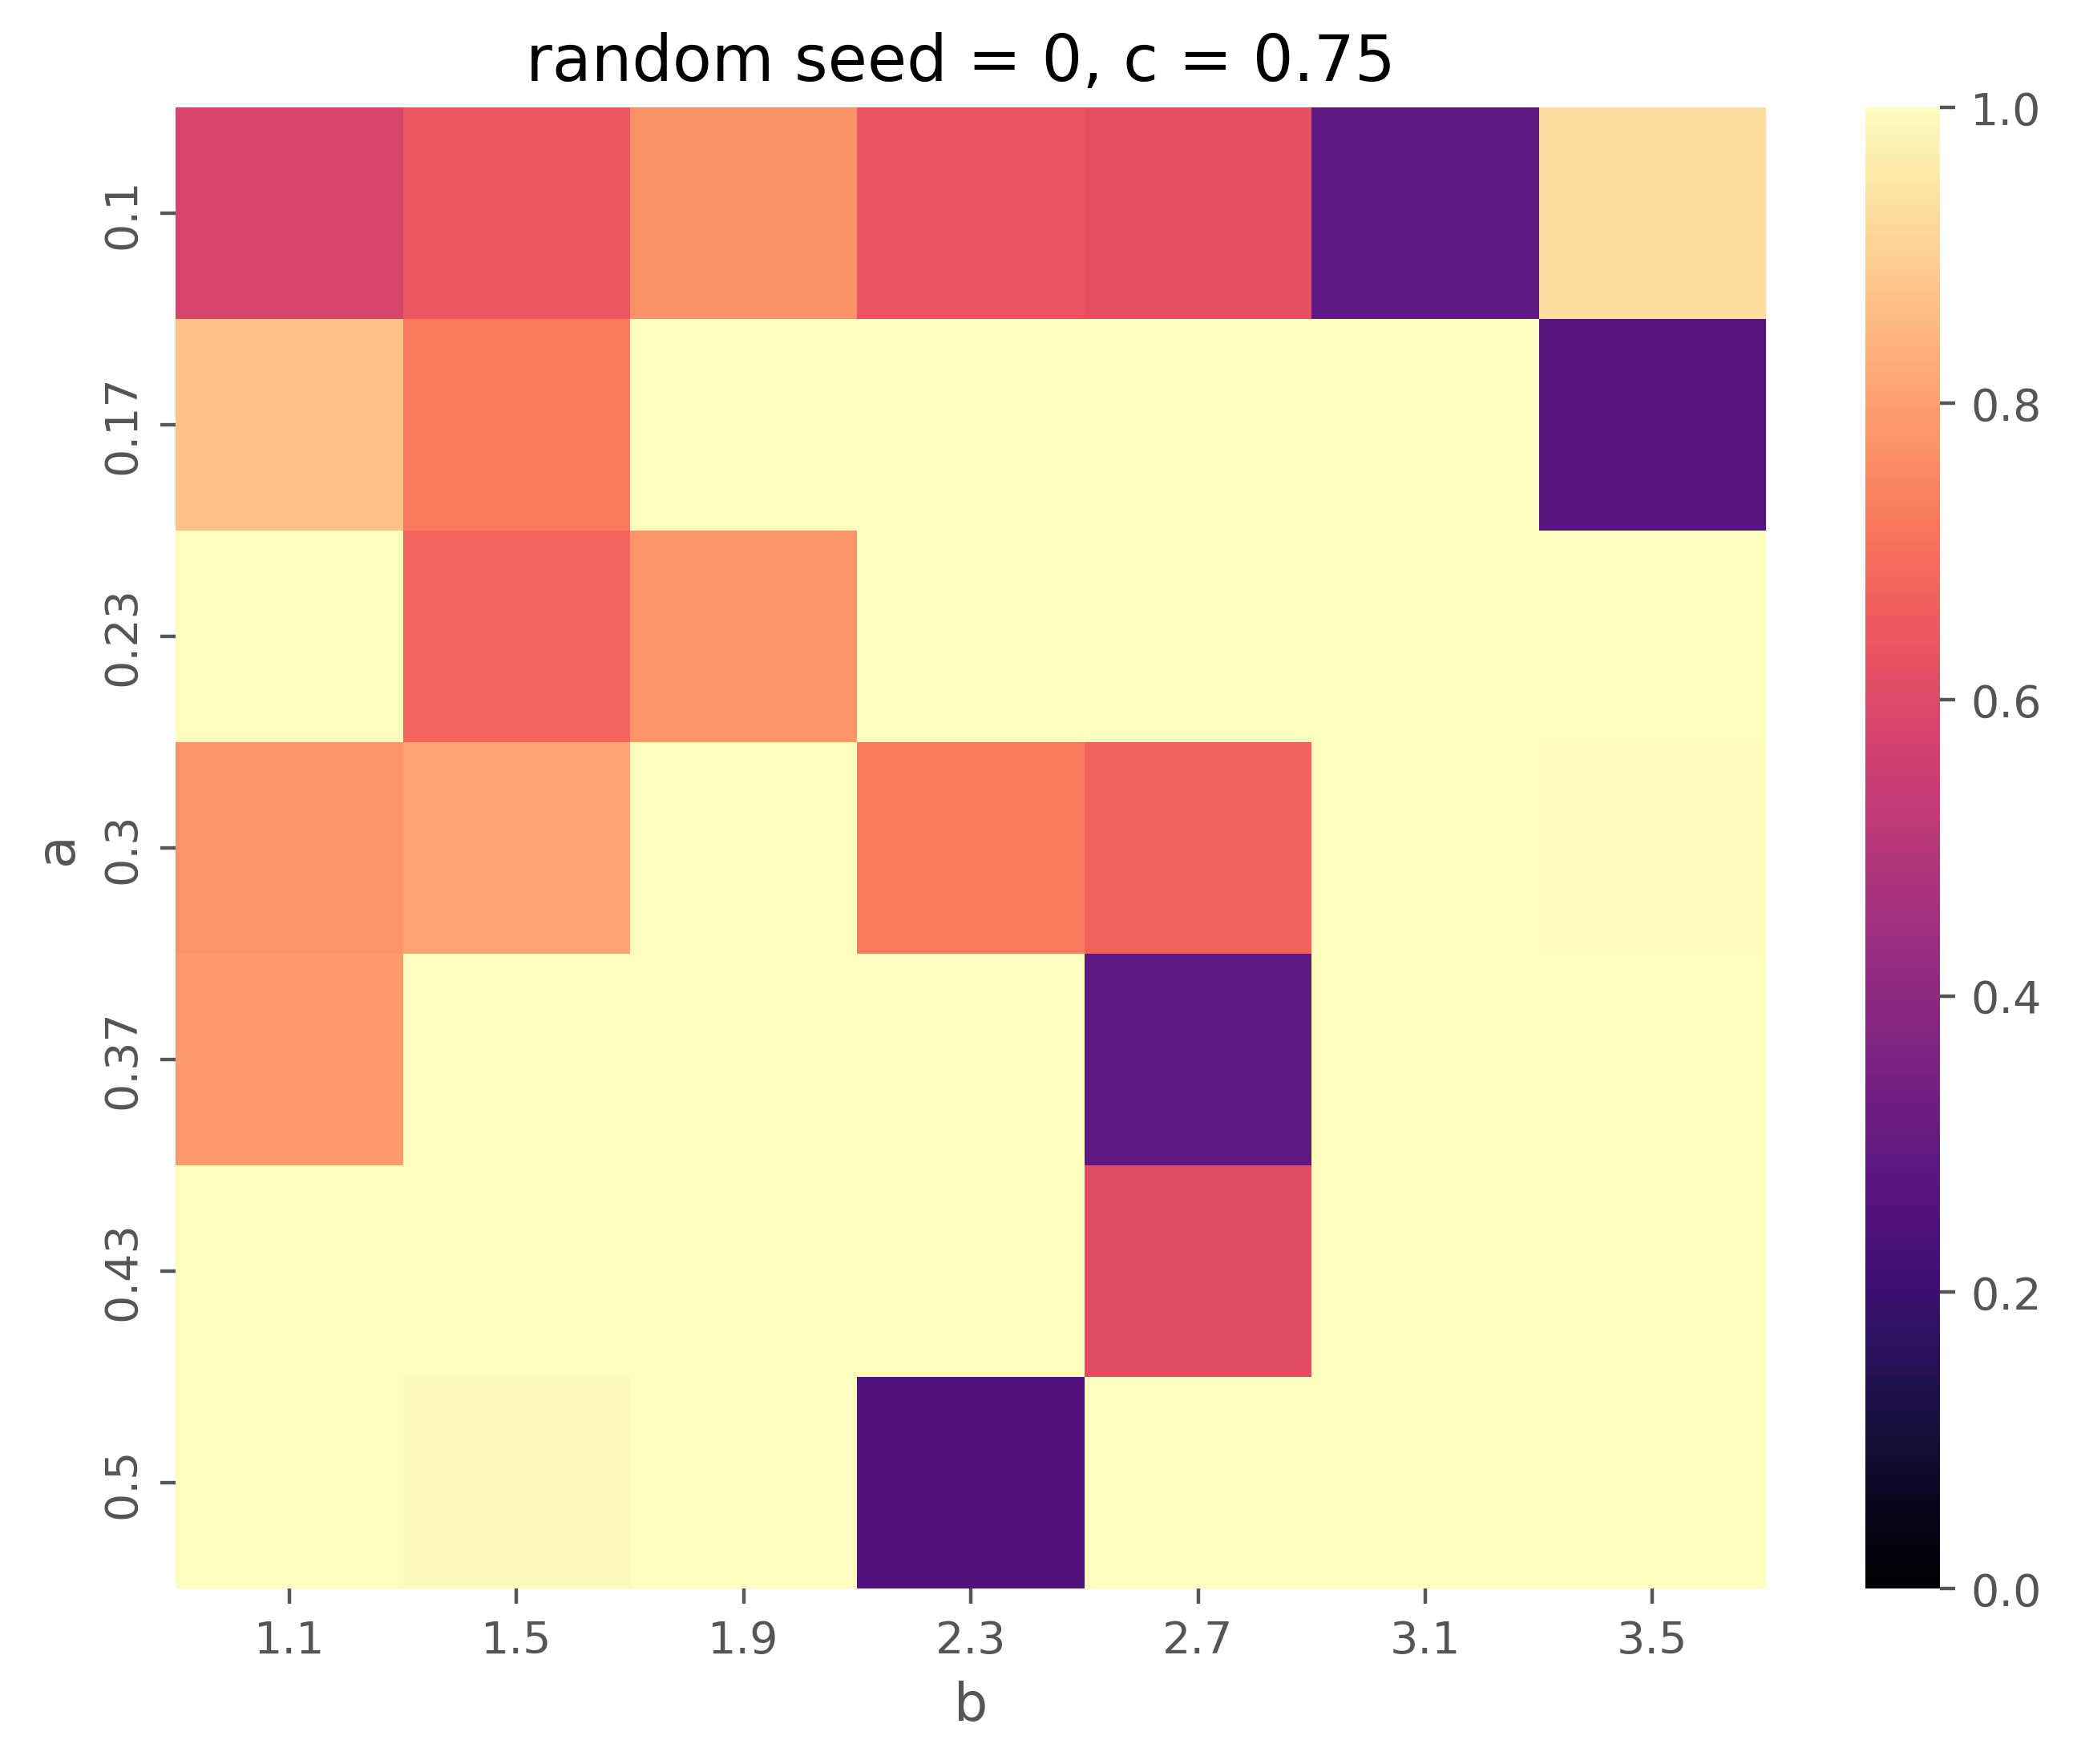

In [96]:
import seaborn as sns
colormap = sns.color_palette("magma", as_cmap=True)
fig = plt.figure(figsize=(8,6),dpi = 400)
sns.heatmap(CI0,cmap = colormap, vmin = 0.0, vmax = 1.0)
plt.xlabel("b")
plt.ylabel('a')
plt.title("random seed = 0, c = 0.75 ")
plt.xticks(ticks = np.arange(N)+0.5, labels = np.around(np.linspace(b_vals[0],b_vals[-1],N),2))
plt.yticks(ticks = np.arange(N)+0.5, labels = np.around(np.linspace(a_vals[0],a_vals[-1],N),2))
plt.show()

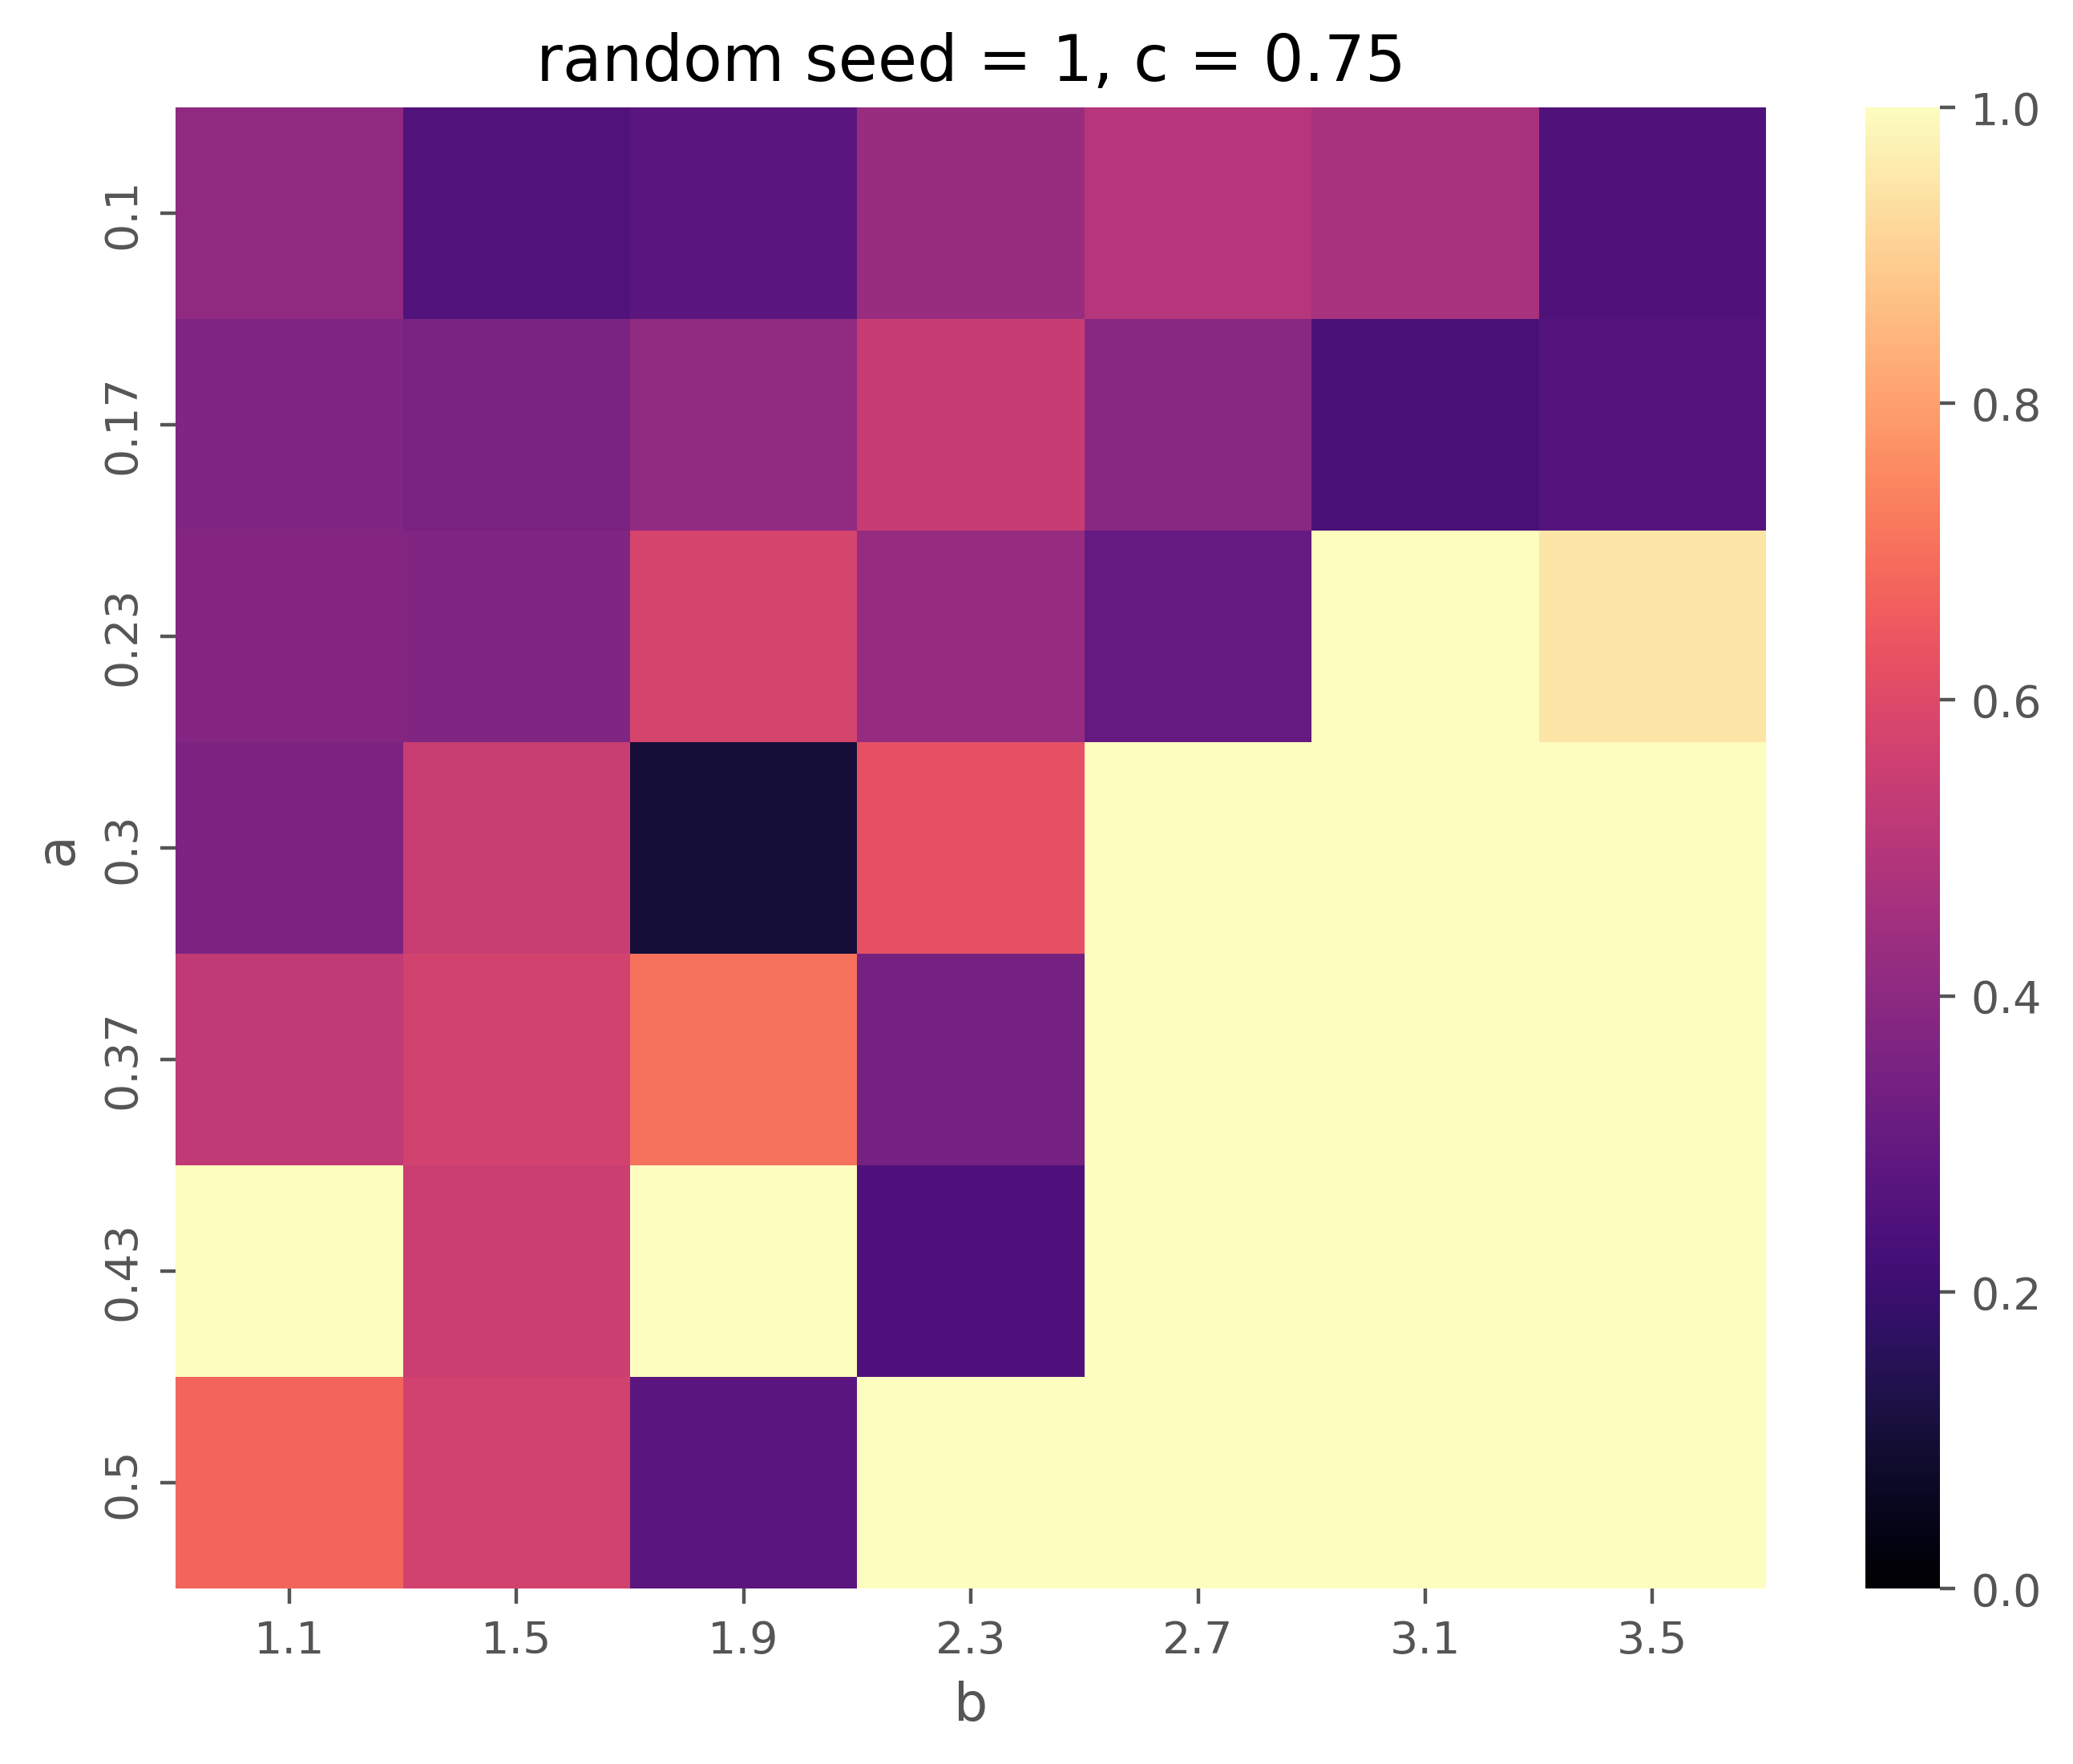

In [81]:
import seaborn as sns
colormap = sns.color_palette("magma", as_cmap=True)
fig = plt.figure(figsize=(8,6),dpi = 400)
sns.heatmap(CI1,cmap = colormap, vmin = 0.0, vmax = 1.0)
plt.xlabel("b")
plt.ylabel('a')
plt.title("random seed = 1, c = 0.75")
plt.xticks(ticks = np.arange(N)+0.5, labels = np.around(np.linspace(b_vals[0],b_vals[-1],N),2))
plt.yticks(ticks = np.arange(N)+0.5, labels = np.around(np.linspace(a_vals[0],a_vals[-1],N),2))
plt.show()

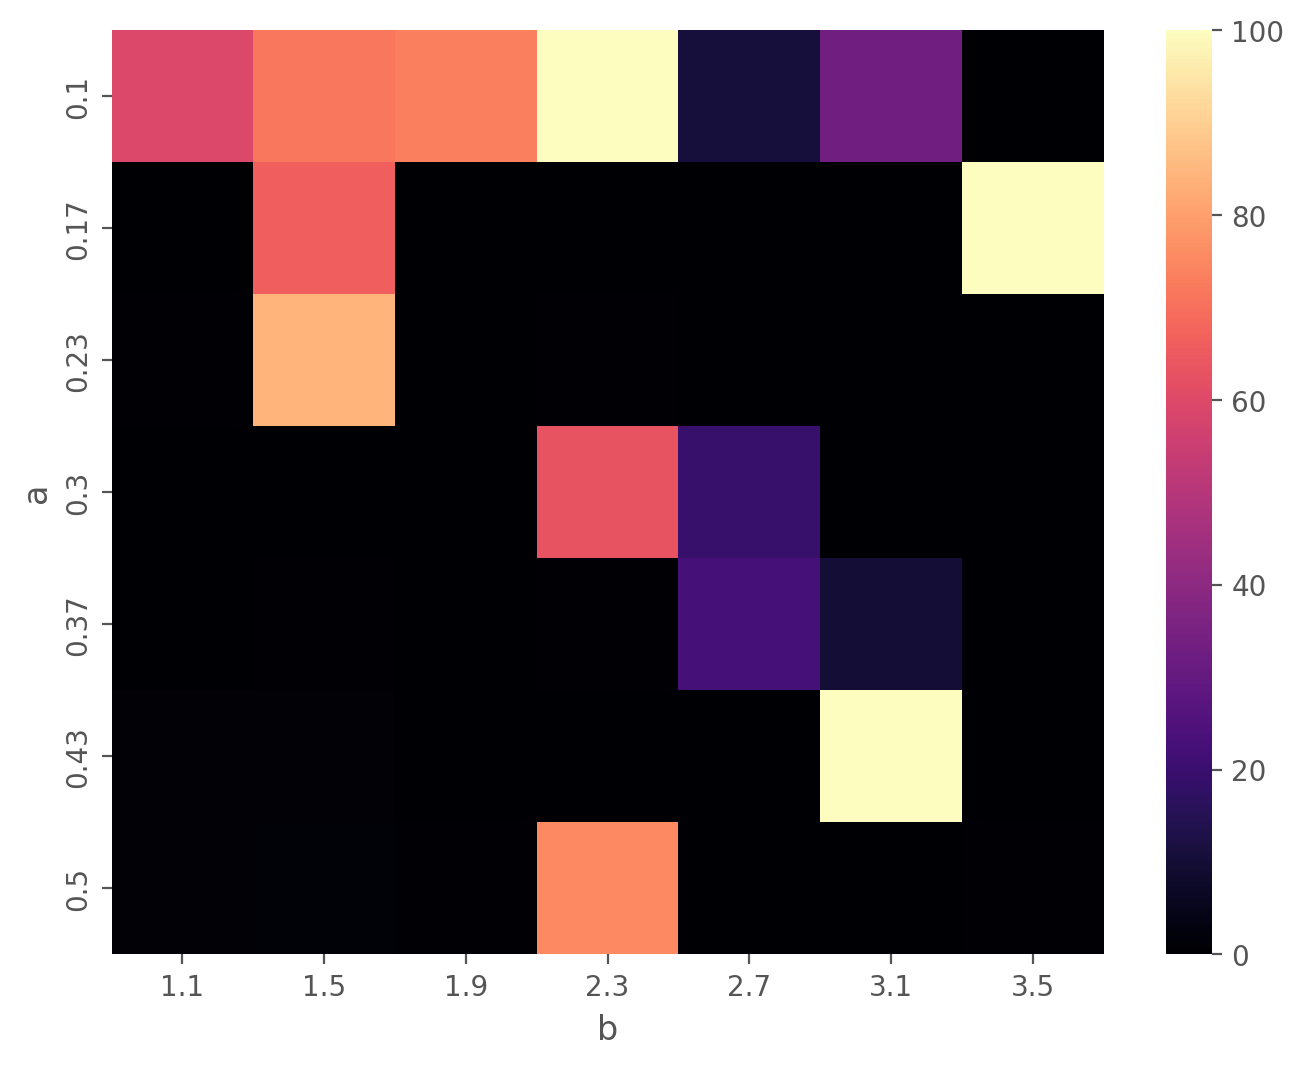

In [45]:
import seaborn as sns
colormap = sns.color_palette("magma", as_cmap=True)
fig = plt.figure(figsize=(8,6),dpi = 200)
sns.heatmap(EU0,cmap = colormap, vmin = 0.0,vmax = 100.)
plt.xlabel("b")
plt.ylabel('a')
plt.xticks(ticks = np.arange(N)+0.5, labels = np.around(np.linspace(b_vals[0],b_vals[-1],N),2))
plt.yticks(ticks = np.arange(N)+0.5, labels = np.around(np.linspace(a_vals[0],a_vals[-1],N),2))
plt.show()

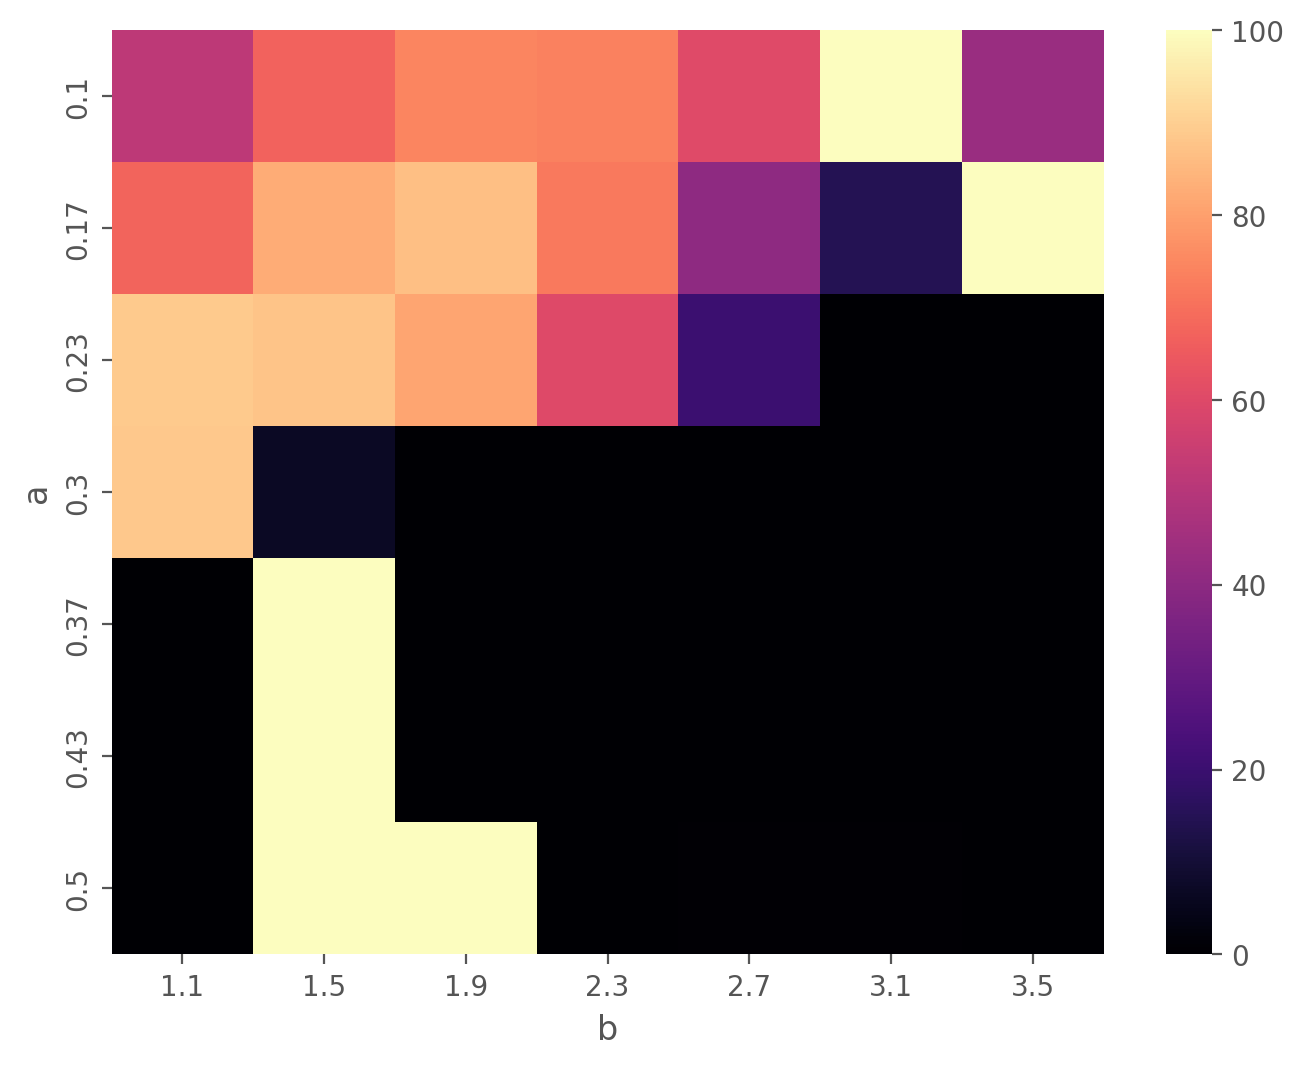

In [46]:
import seaborn as sns
colormap = sns.color_palette("magma", as_cmap=True)
fig = plt.figure(figsize=(8,6),dpi = 200)
sns.heatmap(EU1,cmap = colormap, vmin = 0.0, vmax = 100.)
plt.xlabel("b")
plt.ylabel('a')
plt.xticks(ticks = np.arange(N)+0.5, labels = np.around(np.linspace(b_vals[0],b_vals[-1],N),2))
plt.yticks(ticks = np.arange(N)+0.5, labels = np.around(np.linspace(a_vals[0],a_vals[-1],N),2))
plt.show()

In [66]:
import pandas as pd

df = pd.DataFrame([EU0.ravel(),EU1.ravel(),CI0.ravel(),CI1.ravel()]).T
df.columns= ["Euclid 0","Euclid 1","CI 0","CI 1"]
df.head()

,Euclid 0,Euclid 1,CI 0,CI 1
0,59.431783,51.905667,0.581574,0.409092
1,71.690921,67.158838,0.645354,0.251585
2,73.160161,74.488149,0.770006,0.275352
3,215.828508,73.730793,0.633237,0.426867
4,10.771360,60.190493,0.620069,0.498536


In [67]:
df.corr()

,Euclid 0,Euclid 1,CI 0,CI 1
Euclid 0,1.000000,0.187189,-0.285054,-0.004690
Euclid 1,0.187189,1.000000,-0.336390,-0.544991
CI 0,-0.285054,-0.336390,1.000000,0.094242
CI 1,-0.004690,-0.544991,0.094242,1.000000
